In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-05-06 09:33:30.586406: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 09:33:30.586467: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 09:33:30.586488: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 09:33:30.594017: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packa

Num GPUs Available:  1


2024-05-06 09:33:34.136198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 09:33:34.143157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 09:33:34.143201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
train, trainInfo = tfds.load(name='kmnist', split='train', shuffle_files=True, with_info=True)
test, testInfo = tfds.load(name='kmnist', split='test', shuffle_files=False, with_info=True)

2024-05-06 09:33:34.171672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 09:33:34.171750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 09:33:34.171774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 09:33:34.317935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 09:33:34.318024: I tensorflow/compile

2024-05-06 09:33:34.588091: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


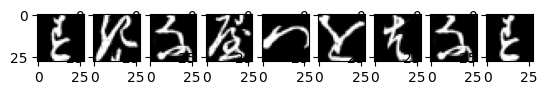

In [3]:
# for fun
labels = trainInfo.features['label'].names
for i, data in enumerate(test.take(140)):
    if (labels[data["label"]] == "ha"):
        ha = data["image"]
    if (labels[data["label"]] == "na"):
        na = data["image"]
    if (labels[data["label"]] == "ki"):
        ki = data["image"]
    if (labels[data["label"]] == "tsu"):
        tsu = data["image"]
    if (labels[data["label"]] == "su"):
        su = data["image"]
    if (labels[data["label"]] == "wo"):
        wo = data["image"]
    if (labels[data["label"]] == "ya"):
        ya = data["image"]
        
plt.subplot(1, 9, 1)
plt.imshow(su, cmap="gray")
plt.subplot(1, 9, 2)
plt.imshow(ki, cmap="gray")
plt.subplot(1, 9, 3)
plt.imshow(na, cmap="gray")
plt.subplot(1, 9, 4)
plt.imshow(ya, cmap="gray")
plt.subplot(1, 9, 5)
plt.imshow(tsu, cmap="gray")
plt.subplot(1, 9, 6)
plt.imshow(wo, cmap="gray")
plt.subplot(1, 9, 7)
plt.imshow(ha, cmap="gray")
plt.subplot(1, 9, 8)
plt.imshow(na, cmap="gray")
plt.subplot(1, 9, 9)
plt.imshow(su, cmap="gray")

2024-05-06 09:33:35.414229: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


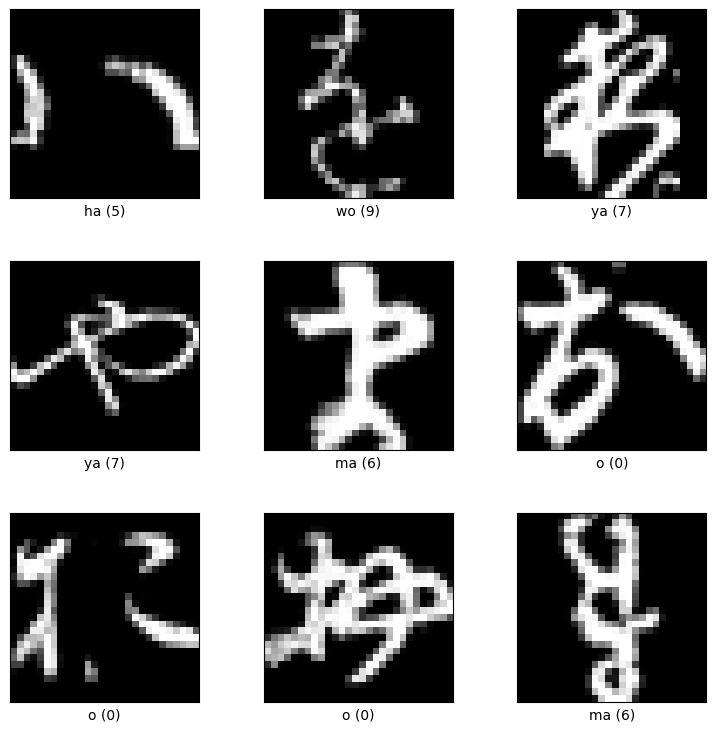

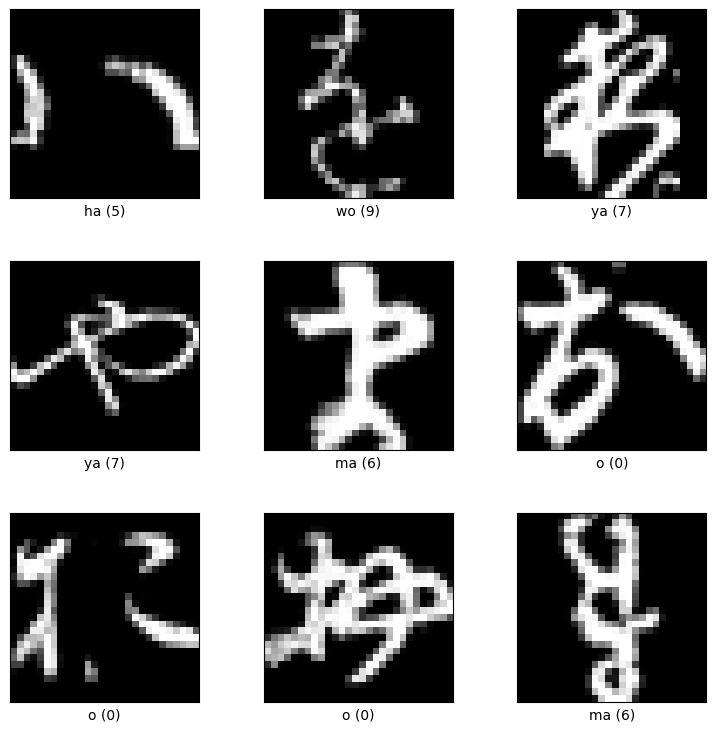

In [4]:
tfds.show_examples(test, testInfo)

2024-05-06 09:33:36.074603: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


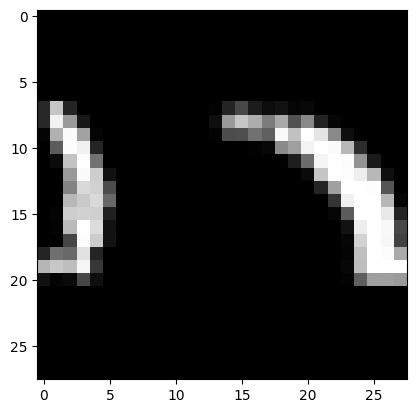

In [5]:
def norm(img):
    x = img['image']
    y = img['label']
    return tf.cast(x, tf.float32) / 255.0 - 0.5, tf.cast(y, tf.float32)

trainNorm = train.map(norm)
testNorm = test.map(norm)

# Da się to po ludzku jakoś lepiej zrobić?
for x, y in testNorm:  #dla testów
    plt.imshow(x, cmap='gray')
    #print(x)
    break

In [6]:
%rm -rf ./logs
%load_ext tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/lab6/2x64relu", histogram_freq=1)
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir="logs/lab6/64tanh,64relu", histogram_freq=1)
tensorboard_callback3 = tf.keras.callbacks.TensorBoard(log_dir="logs/lab6/64relu,2x32relu", histogram_freq=1)
tensorboard_callback4 = tf.keras.callbacks.TensorBoard(log_dir="logs/lab6/4x32relu", histogram_freq=1)

In [7]:
print(trainInfo)

tfds.core.DatasetInfo(
    name='kmnist',
    full_name='kmnist/3.0.1',
    description="""
    Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.
    """,
    homepage='http://codh.rois.ac.jp/kmnist/index.html.en',
    data_dir='/root/tensorflow_datasets/kmnist/3.0.1',
    file_format=tfrecord,
    download_size=20.26 MiB,
    dataset_size=31.76 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@onlin

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
batchSize = 256
epochNum = 15
trainDataset = trainNorm.cache().repeat().shuffle(trainInfo.splits['train'].num_examples).batch(batchSize).prefetch(tf.data.AUTOTUNE)
testDataset = testNorm.cache().batch(batchSize).prefetch(tf.data.AUTOTUNE)

In [10]:
print("2x32relu")
model.fit( trainDataset, epochs=epochNum, validation_data=testDataset, verbose=1, callbacks=[tensorboard_callback], steps_per_epoch=trainInfo.splits['train'].num_examples//batchSize)
print("32tanh,32relu")
model2.fit(trainDataset, epochs=epochNum, validation_data=testDataset, verbose=1, callbacks=[tensorboard_callback2], steps_per_epoch=trainInfo.splits['train'].num_examples//batchSize)
print("2x64relu")
model3.fit(trainDataset, epochs=epochNum, validation_data=testDataset, verbose=1, callbacks=[tensorboard_callback3], steps_per_epoch=trainInfo.splits['train'].num_examples//batchSize)
print("4x32relu")
model4.fit(trainDataset, epochs=epochNum, validation_data=testDataset, verbose=1, callbacks=[tensorboard_callback4], steps_per_epoch=trainInfo.splits['train'].num_examples//batchSize)

2x32relu
Epoch 1/15


2024-05-06 09:33:40.259615: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563cefbf5600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 09:33:40.259671: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-06 09:33:40.271985: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 09:33:40.294898: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-05-06 09:33:40.370198: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


234/234 [==============================] - 5s 9ms/step - loss: 0.8973 - accuracy: 0.7183 - val_loss: 0.9820 - val_accuracy: 0.6912
Epoch 2/15
234/234 [==============================] - 1s 6ms/step - loss: 0.4914 - accuracy: 0.8524 - val_loss: 0.8164 - val_accuracy: 0.7410
Epoch 3/15
234/234 [==============================] - 2s 7ms/step - loss: 0.3941 - accuracy: 0.8812 - val_loss: 0.7346 - val_accuracy: 0.7692
Epoch 4/15
234/234 [==============================] - 2s 7ms/step - loss: 0.3466 - accuracy: 0.8941 - val_loss: 0.6956 - val_accuracy: 0.7817
Epoch 5/15
234/234 [==============================] - 2s 7ms/step - loss: 0.3133 - accuracy: 0.9046 - val_loss: 0.6665 - val_accuracy: 0.7972
Epoch 6/15
234/234 [==============================] - 2s 7ms/step - loss: 0.2905 - accuracy: 0.9126 - val_loss: 0.6669 - val_accuracy: 0.7954
Epoch 7/15
234/234 [==============================] - 2s 7ms/step - loss: 0.2723 - accuracy: 0.9180 - val_loss: 0.6429 - val_accuracy: 0.8039
Epoch 8/15
234/23

In [11]:
testImages = []
testLabels = []

for image, label in testNorm.shuffle(trainInfo.splits['test'].num_examples).take(8):
    testImages.append(image)
    testLabels.append(label)

predictions = model.predict(np.array(testImages))

print("2x32relu: label -> predykcja:")
for i in range(8):
    print(int(testLabels[i]), "->", np.argmax(predictions[i]))
    
predictions = model2.predict(np.array(testImages))

print("32tanh,32relu: label -> predykcja:")
for i in range(8):
    print(int(testLabels[i]), "->", np.argmax(predictions[i]))
    
predictions = model3.predict(np.array(testImages))

print("2x64relu: label -> predykcja:")
for i in range(8):
    print(int(testLabels[i]), "->", np.argmax(predictions[i]))
    
predictions = model4.predict(np.array(testImages))

print("4x32relu: label -> predykcja:")
for i in range(8):
    print(int(testLabels[i]), "->", np.argmax(predictions[i]))


1/1 [==============================] - 0s 89ms/step
2x32relu: label -> predykcja:
0 -> 0
0 -> 0
2 -> 1
7 -> 7
1 -> 1
1 -> 1
5 -> 5
1 -> 1
1/1 [==============================] - 0s 50ms/step
32tanh,32relu: label -> predykcja:
0 -> 0
0 -> 0
2 -> 9
7 -> 7
1 -> 9
1 -> 1
5 -> 5
1 -> 1
1/1 [==============================] - 0s 51ms/step
2x64relu: label -> predykcja:
0 -> 0
0 -> 0
2 -> 9
7 -> 7
1 -> 1
1 -> 1
5 -> 5
1 -> 4
1/1 [==============================] - 0s 61ms/step
4x32relu: label -> predykcja:
0 -> 0
0 -> 0
2 -> 1
7 -> 7
1 -> 1
1 -> 1
5 -> 5
1 -> 1


![9.png](9.png)

![10.png](10.png)